# **TikTok Project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

Your TikTok data team is still in the early stages of their latest project. So far, you’ve completed a project proposal and used Python to inspect and organize the TikTok dataset.

Orion Rainier, a Data Scientist at TikTok, is pleased with the work you have already completed and is requesting your assistance with some Exploratory Data Analysis (EDA) and data visualization. The management team asked to see a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help us understand the data. At the very least, include a graph comparing claim counts to opinion counts, as well as boxplots of the most important variables (like “video duration,” “video like count,” “video comment count,” and “video view count”) to check for outliers. Also, include a breakdown of “author ban status” counts.

Additionally, the management team has recently asked all EDA to include Tableau visualizations. Tableau visualizations are particularly helpful in status reports to the client and board members. For this data, create a Tableau dashboard showing a simple claims versus opinions count, as well as stacked bar charts of claims versus opinions for variables like video view counts, video like counts, video share counts, and video download counts. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director is a person with visual impairments.

You also notice a follow-up email from the Data Science Lead, Willow Jaffey. Willow suggests including an executive summary of your analysis to share with teammates.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 3 End-of-course project: Exploratory data analysis**

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs.

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. Of particular interest is information related to what distinguishes claim videos from opinion videos.

**The goal** is to explore the dataset and create visualizations.
<br/>
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Build visualizations

**Part 4:** Evaluate and share results

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.

# **Visualize a story in Tableau and Python**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document and those below where applicable to craft your response:
1. Identify any outliers:


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?



==> ENTER YOUR RESPONSE HERE

### **Task 1. Imports, links, and loading**
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps.

Link to supporting materials:
Public Tableau: https://public.tableau.com/s/. Note that the TikTok dataset can be downloaded directly from this notebook by going to "Lab Files" in the menu bar at the top of the page, clicking into the "/home/jovyan/work" folder, selecting `tiktok_dataset.csv`, and clicking "Download" above the list of files. 

For EDA of the data, import the packages that would be most helpful, such as `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Then, load the dataset into a dataframe. Read in the data and store it as a dataframe object.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.


In [2]:
# Load dataset into dataframe
raw_data = pd.read_csv("../Guides/datasets/tiktok_dataset.csv")
data = pd.read_csv("../Guides/datasets/tiktok_dataset.csv")

FileNotFoundError: [Errno 2] No such file or directory: '../Guides/datasets/tiktok_dataset.csv'

In [ ]:
len(raw_data[raw_data.isnull().any(axis=1)]) / len(raw_data)

0.015375090289959757

In [ ]:
#settings
pd.set_option('display.max_colwidth', 20)
pd.set_option("display.max_columns",None)

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document and those below where applicable to complete your code.

### **Task 2a: Data exploration and cleaning**

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set.

Consider functions that help you understand and structure the data.

*    `.head()`
*    `.info()`
*    `.describe()`
*    `.groupby()`
*    `.sort_values()`

Consider the following questions as you work:

What do you do about missing data (if any)?

Are there data outliers?

Start by discovering, using `.head()`, `.size`, and `.shape`.

In [ ]:
# Display and examine the first few rows of the dataframe
data

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared w...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared w...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared w...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared w...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared w...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19377,19378,NaN,7578226840,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,19379,NaN,6079236179,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,19380,NaN,2565539685,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,2969178540,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [ ]:
replace_dict = {"video_":"",
                "count":"#"
                }
data.columns = data.columns.to_series().replace(replace_dict, regex=True).values
data = data.drop(columns=["#","id"])
data

,claim_status,duration_sec,transcription_text,verified_status,author_ban_status,view_#,like_#,share_#,download_#,comment_#
0,claim,59,someone shared w...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,32,someone shared w...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,31,someone shared w...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,25,someone shared w...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,19,someone shared w...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
19377,NaN,21,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19378,NaN,53,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN
19379,NaN,10,NaN,verified,under review,NaN,NaN,NaN,NaN,NaN
19380,NaN,24,NaN,not verified,active,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Get the size of the data
### YOUR CODE HERE ###
data.size,data.shape

(193820, (19382, 10))

Get basic information about the data, using `.info()`.

In [ ]:
# Get basic information about the data
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   claim_status        19084 non-null  object 
 1   duration_sec        19382 non-null  int64  
 2   transcription_text  19084 non-null  object 
 3   verified_status     19382 non-null  object 
 4   author_ban_status   19382 non-null  object 
 5   view_#              19084 non-null  float64
 6   like_#              19084 non-null  float64
 7   share_#             19084 non-null  float64
 8   download_#          19084 non-null  float64
 9   comment_#           19084 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.5+ MB


Generate a table of descriptive statistics, using `.describe()`.

In [ ]:
# Generate a table of descriptive statistics
data.describe()


,duration_sec,view_#,like_#,share_#,download_#,comment_#
count,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [ ]:
mask_nan_data = data.isna()
mask_nan_data = mask_nan_data.any(axis=1)
mask_nan_data.value_counts()

False    19084
True       298
Name: count, dtype: int64

In [ ]:
nan_data = data[mask_nan_data]
valid_data = data[~mask_nan_data] # all NaN data entries are not finished, thats why they are irrelevant for anaylsis

In [ ]:
data = valid_data
data

,claim_status,duration_sec,transcription_text,verified_status,author_ban_status,view_#,like_#,share_#,download_#,comment_#
0,claim,59,someone shared w...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,32,someone shared w...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,31,someone shared w...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,25,someone shared w...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,19,someone shared w...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
19079,opinion,49,in our opinion t...,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,opinion,23,in our opinion t...,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,opinion,50,in our opinion t...,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,opinion,8,in our opinion l...,not verified,active,3394.0,655.0,123.0,11.0,4.0


In [ ]:
data_claim_group = data.groupby(["claim_status"])
data_claim_group.apply(lambda x: x)

claim_status  duration_sec   transcription_text  \
claim_status                                                         
claim        0            claim            59  someone shared w...   
             1            claim            32  someone shared w...   
             2            claim            31  someone shared w...   
             3            claim            25  someone shared w...   
             4            claim            19  someone shared w...   
...                         ...           ...                  ...   
opinion      19079      opinion            49  in our opinion t...   
             19080      opinion            23  in our opinion t...   
             19081      opinion            50  in our opinion t...   
             19082      opinion             8  in our opinion l...   
             19083      opinion            58  in our opinion a...   

                   verified_status author_ban_status    view_#    like_#  \
claim_status                                                               
claim        0        not verified      under review  343296.0   19425.0   
             1        not verified            active  140877.0   77355.0   
             2        not verified            active  902185.0   97690.0   
             3        not verified            active  437506.0  239954.0   
             4        not verified            active   56167.0   34987.0   
...                            ...               ...       ...       ...   
opinion      19079    not verified            active    6067.0     423.0   
             19080    not verified            active    2973.0     820.0   
             19081    not verified            active     734.0     102.0   
             19082    not verified            active    3394.0     655.0   
             19083    not verified            active    5034.0     815.0   

                    share_#  download_#  comment_#  
claim_status                                        
claim        0        241.0         1.0        0.0  
             1      19034.0      1161.0      684.0  
             2       2858.0       833.0      329.0  
             3      34812.0      1234.0      584.0  
             4       4110.0       547.0      152.0  
...                     ...         ...        ...  
opinion      19079     81.0         8.0        2.0  
             19080     70.0         3.0        0.0  
             19081      7.0         2.0        1.0  
             19082    123.0        11.0        4.0  
             19083    281.0        11.0        1.0  

[19084 rows x 10 columns]

In [ ]:
data_claim_group.describe()

duration_sec                                                     \
                    count       mean        std  min   25%   50%   75%   max   
claim_status                                                                   
claim              9608.0  32.486886  16.172409  5.0  18.0  32.0  47.0  60.0   
opinion            9476.0  32.359856  16.281705  5.0  18.0  32.0  47.0  60.0   

              view_#                                                   \
               count           mean            std     min        25%   
claim_status                                                            
claim         9608.0  501029.452748  291349.239825  1049.0  247003.75   
opinion       9476.0    4956.432250    2885.907219    20.0    2467.00   

                                             like_#                 \
                   50%        75%       max   count           mean   
claim_status                                                         
claim         501555.0  753088.00  999817.0  9608.0  166373.331182   
opinion         4953.0    7447.25    9998.0  9476.0    1092.729844   

                                                                           \
                        std  min       25%       50%        75%       max   
claim_status                                                                
claim         147623.370888  0.0  43436.75  123649.0  255715.25  657830.0   
opinion          964.099816  0.0    289.00     823.0    1664.00    4375.0   

             share_#                                                     \
               count          mean           std  min      25%      50%   
claim_status                                                              
claim         9608.0  33026.416216  38781.676825  0.0  5062.25  17997.5   
opinion       9476.0    217.145631    252.269583  0.0    34.00    121.0   

                                download_#                                 \
                  75%       max      count         mean          std  min   
claim_status                                                                
claim         47256.0  256130.0     9608.0  2070.952227  2424.381846  0.0   
opinion         314.0    1674.0     9476.0    13.677290    16.200652  0.0   

                                              comment_#              \
                 25%     50%     75%      max     count        mean   
claim_status                                                          
claim         324.75  1139.5  2935.5  14994.0    9608.0  691.164863   
opinion         2.00     7.0    19.0    101.0    9476.0    2.697446   

                                                            
                      std  min   25%    50%    75%     max  
claim_status                                                
claim         1017.216834  0.0  68.0  286.0  886.0  9599.0  
opinion          4.089288  0.0   0.0    1.0    3.0    32.0

In [ ]:
type(data_claim_group["view_#"].mean())

pandas.core.series.Series

In [ ]:
data_claim_group["view_#"].mean()

claim_status
claim      501029.452748
opinion      4956.432250
Name: view_#, dtype: float64

In [ ]:
data["claim_status"].value_counts().index

Index(['claim', 'opinion'], dtype='object', name='claim_status')

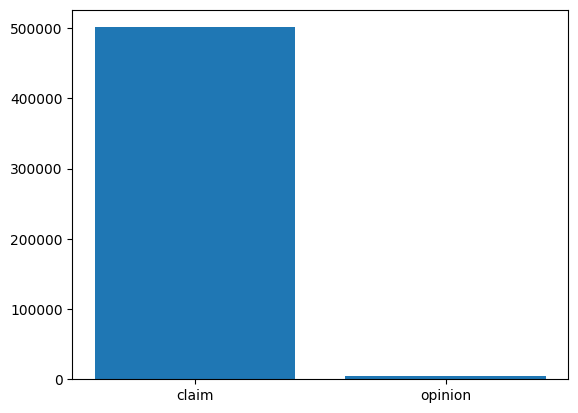

In [ ]:
plt.bar(x=data_claim_group["view_#"].mean().index, height=data_claim_group["view_#"].mean())
plt.show()

<Axes: >

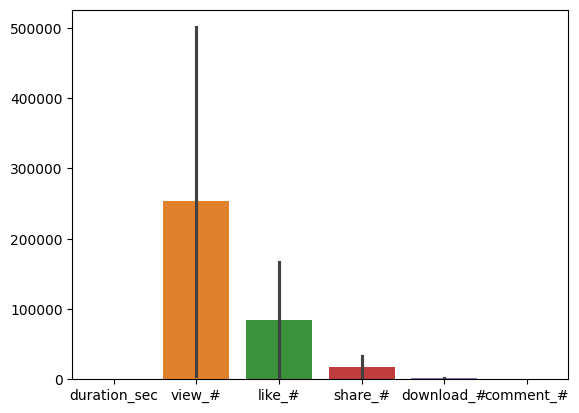

In [ ]:
sns.barplot(data_claim_group.mean(numeric_only=True))

In [ ]:
claim_data = data[data["claim_status"] == "claim"]
opinion_data = data[data["claim_status"] == "opinion"]

In [ ]:
data["claim_status"].value_counts().index#.loc["claim"]

Index(['claim', 'opinion'], dtype='object', name='claim_status')

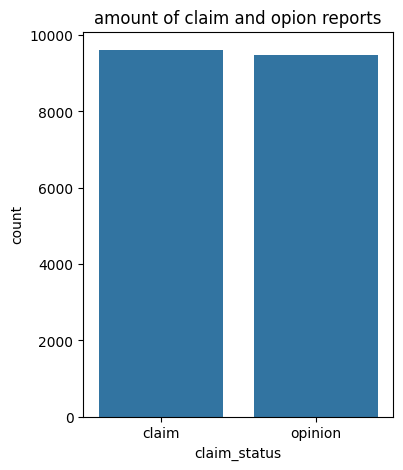

In [ ]:
plt.figure(figsize=(4,5))
sns.barplot(data["claim_status"].value_counts())
plt.title("amount of claim and opion reports")
plt.show()

### **Task 2b. Assess data types**

In Tableau, staying on the data source page, double check the data types of the columns in the dataset. Refer to the dimensions and measures in Tableau.


Review the instructions linked in the previous Activity document to create the required Tableau visualization.

### **Task 2c. Select visualization type(s)**

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TikTok dataset. What type of data visualization(s) would be most helpful? Consider the distribution of the data.

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


bar chart and box plot

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Build visualizations**

Now that you have assessed your data, it’s time to plot your visualization(s).

#### **video_duration_sec**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

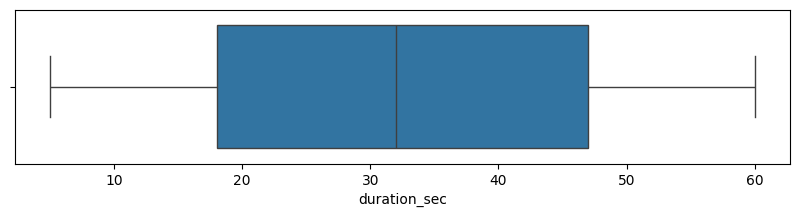

In [ ]:
# Create a boxplot to isualize distribution of `video_duration_sec`
plt.figure(figsize=(10,2))
sns.boxplot(x=data["duration_sec"])
plt.show()

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

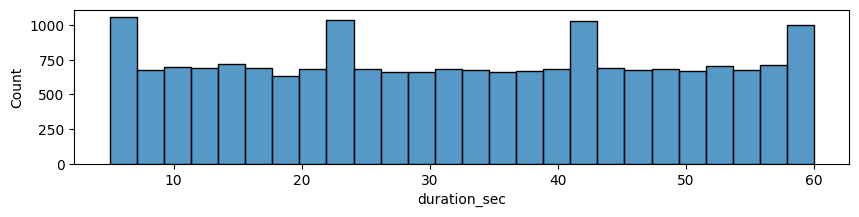

In [ ]:
# Create a histogram
plt.figure(figsize=(10,2))
sns.histplot(x=data["duration_sec"])
plt.show()


**Question:** What do you notice about the duration and distribution of the videos?

#### **video_view_count**

Create a box plot to examine the spread of values in the `video_view_count` column.

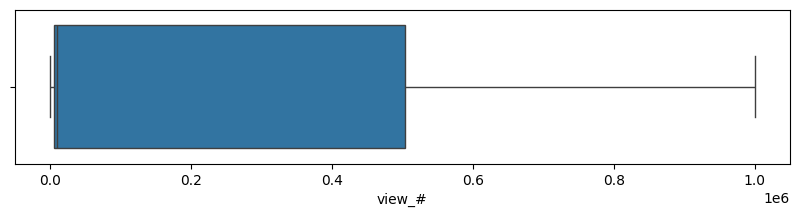

In [ ]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(10,2))
sns.boxplot(x=data["view_#"])
plt.show()

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

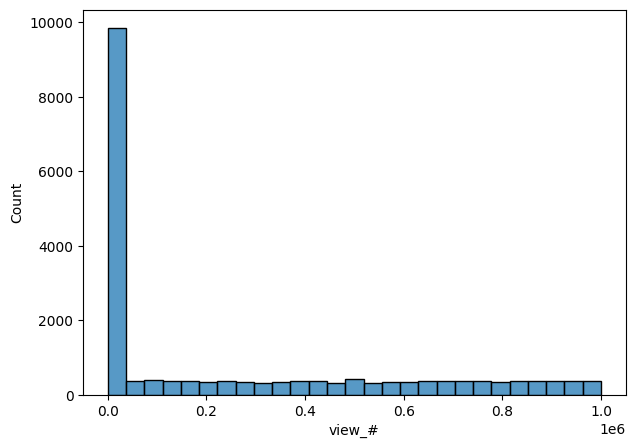

In [ ]:
# Create a histogram
plt.figure(figsize=(7,5))
sns.histplot(x=data["view_#"])
plt.show()

**Question:** What do you notice about the distribution of this variable?

#### **video_like_count**

Create a box plot to examine the spread of values in the `video_like_count` column.

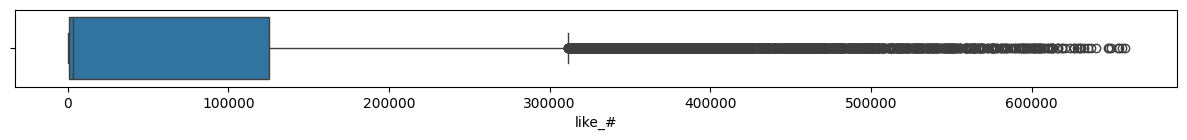

In [ ]:
# Create a boxplot to visualize distribution of `video_like_count`
### YOUR CODE HERE ###

plt.figure(figsize=(15,1))
sns.boxplot(x=data["like_#"])
plt.show()

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

In [ ]:
data["like_#"].describe()

count     19084.000000
mean      84304.636030
std      133420.546814
min           0.000000
25%         810.750000
50%        3403.500000
75%      125020.000000
max      657830.000000
Name: like_#, dtype: float64

In [ ]:
136/190

0.7157894736842105

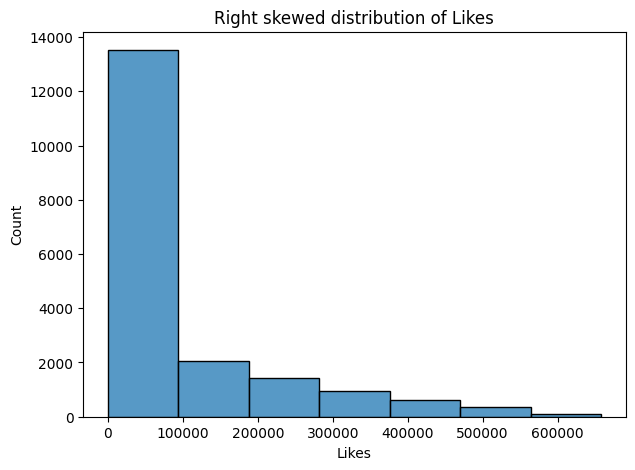

In [ ]:
# Create a histogram
### YOUR CODE HERE ###
plt.figure(figsize=(7,5))
sns.histplot(x=data["like_#"],binwidth=1e5)
plt.xlabel("Likes")
plt.title("Right skewed distribution of Likes")
plt.show()

**Question:** What do you notice about the distribution of this variable?

#### **video_comment_count**

Create a box plot to examine the spread of values in the `video_comment_count` column.

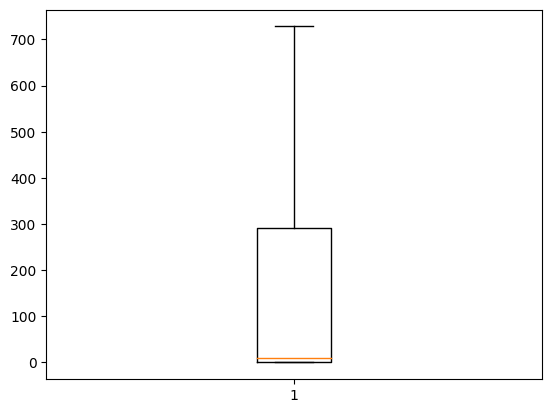

In [ ]:
# Create a boxplot to visualize distribution of `video_comment_count`
### YOUR CODE HERE ###

plt.boxplot(data["comment_#"].dropna(), showfliers=False)
plt.show()

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

In [ ]:
# Create a histogram
### YOUR CODE HERE ###


**Question:** What do you notice about the distribution of this variable?

#### **video_share_count**

Create a box plot to examine the spread of values in the `video_share_count` column.

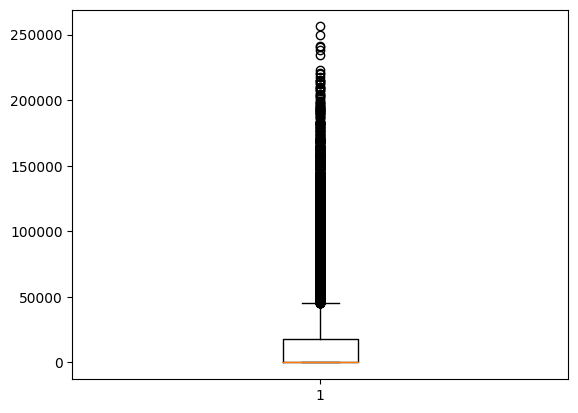

In [ ]:
# Create a boxplot to visualize distribution of `video_share_count`
### YOUR CODE HERE ###
plt.boxplot(data["share_#"].dropna(), showfliers=True)
plt.show()

*Create* a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

In [ ]:
# Create a histogram
### YOUR CODE HERE ###


**Question:** What do you notice about the distribution of this variable?

#### **video_download_count**

Create a box plot to examine the spread of values in the `video_download_count` column.

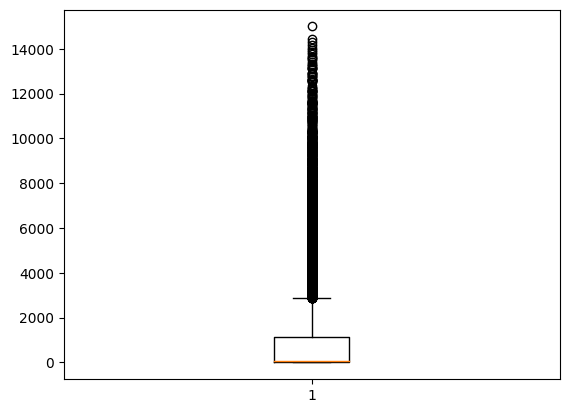

In [ ]:
# Create a boxplot to visualize distribution of `video_download_count`
### YOUR CODE HERE ###
plt.boxplot(data["download_#"].dropna(), showfliers=True)
plt.show()

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

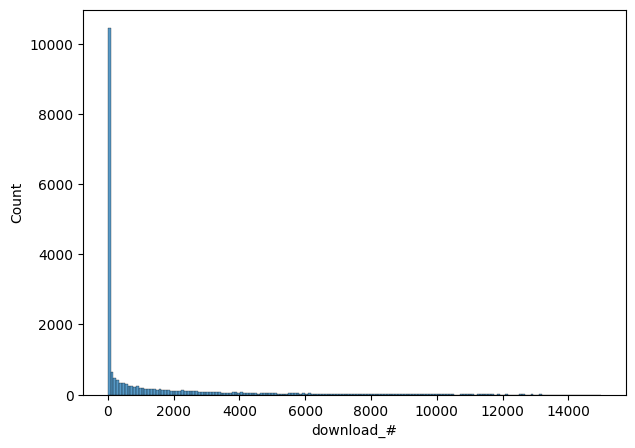

In [ ]:
# Create a histogram
plt.figure(figsize=(7,5))
sns.histplot(x=data["download_#"])
plt.show()


**Question:** What do you notice about the distribution of this variable?

In [ ]:
data

,claim_status,duration_sec,transcription_text,verified_status,author_ban_status,view_#,like_#,share_#,download_#,comment_#
0,claim,59,someone shared w...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,32,someone shared w...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,31,someone shared w...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,25,someone shared w...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,19,someone shared w...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...
19079,opinion,49,in our opinion t...,not verified,active,6067.0,423.0,81.0,8.0,2.0
19080,opinion,23,in our opinion t...,not verified,active,2973.0,820.0,70.0,3.0,0.0
19081,opinion,50,in our opinion t...,not verified,active,734.0,102.0,7.0,2.0,1.0
19082,opinion,8,in our opinion l...,not verified,active,3394.0,655.0,123.0,11.0,4.0


In [ ]:
data_claim_group.describe()

duration_sec                                                     \
                    count       mean        std  min   25%   50%   75%   max   
claim_status                                                                   
claim              9608.0  32.486886  16.172409  5.0  18.0  32.0  47.0  60.0   
opinion            9476.0  32.359856  16.281705  5.0  18.0  32.0  47.0  60.0   

              view_#                                                   \
               count           mean            std     min        25%   
claim_status                                                            
claim         9608.0  501029.452748  291349.239825  1049.0  247003.75   
opinion       9476.0    4956.432250    2885.907219    20.0    2467.00   

                                             like_#                 \
                   50%        75%       max   count           mean   
claim_status                                                         
claim         501555.0  753088.00  999817.0  9608.0  166373.331182   
opinion         4953.0    7447.25    9998.0  9476.0    1092.729844   

                                                                           \
                        std  min       25%       50%        75%       max   
claim_status                                                                
claim         147623.370888  0.0  43436.75  123649.0  255715.25  657830.0   
opinion          964.099816  0.0    289.00     823.0    1664.00    4375.0   

             share_#                                                     \
               count          mean           std  min      25%      50%   
claim_status                                                              
claim         9608.0  33026.416216  38781.676825  0.0  5062.25  17997.5   
opinion       9476.0    217.145631    252.269583  0.0    34.00    121.0   

                                download_#                                 \
                  75%       max      count         mean          std  min   
claim_status                                                                
claim         47256.0  256130.0     9608.0  2070.952227  2424.381846  0.0   
opinion         314.0    1674.0     9476.0    13.677290    16.200652  0.0   

                                              comment_#              \
                 25%     50%     75%      max     count        mean   
claim_status                                                          
claim         324.75  1139.5  2935.5  14994.0    9608.0  691.164863   
opinion         2.00     7.0    19.0    101.0    9476.0    2.697446   

                                                            
                      std  min   25%    50%    75%     max  
claim_status                                                
claim         1017.216834  0.0  68.0  286.0  886.0  9599.0  
opinion          4.089288  0.0   0.0    1.0    3.0    32.0

In [ ]:
rates_claim_ratio = data.groupby(["claim_status"]).mean(numeric_only=True).drop(columns="duration_sec")
rates_claim_ratio

,view_#,like_#,share_#,download_#,comment_#
claim_status,,,,,
claim,501029.452748,166373.331182,33026.416216,2070.952227,691.164863
opinion,4956.432250,1092.729844,217.145631,13.677290,2.697446


In [ ]:
rates_claim_ratio.loc["ratio"] = rates_claim_ratio.loc["claim"]/ rates_claim_ratio.loc["opinion"] 
rates_claim_ratio.astype(int)
rates_claim_ratio.columns = rates_claim_ratio.columns.str.replace("_#","s") 


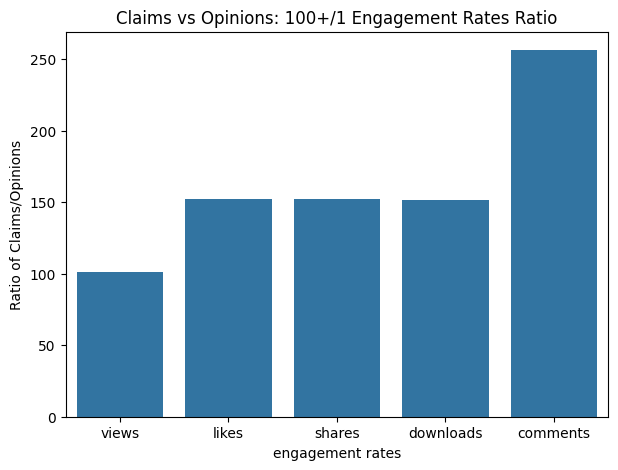

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(rates_claim_ratio.loc["ratio"])

plt.xlabel("engagement rates")
plt.ylabel("Ratio of Claims/Opinions")
plt.title("Claims vs Opinions: 100+/1 Engagement Rates Ratio")

plt.show()

In [ ]:
rates_claim_ratio

,views,likes,shares,downloads,comments
claim_status,,,,,
claim,501029.452748,166373.331182,33026.416216,2070.952227,691.164863
opinion,4956.432250,1092.729844,217.145631,13.677290,2.697446
ratio,101.086715,152.254770,152.093395,151.415392,256.229343


#### **Claim status by verification status**

Now, create a histogram with four bars: one for each combination of claim status and verification status.

In [ ]:
data.groupby(["claim_status","verified_status"])

In [ ]:
# Create a histogram
ax = sns.histplot(data,
             x="claim_status",
             hue="verified_status",
             multiple="dodge")

for i in ax.containers:
  ax.bar_label(i)
plt.show()

NameError: name 'sns' is not defined

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

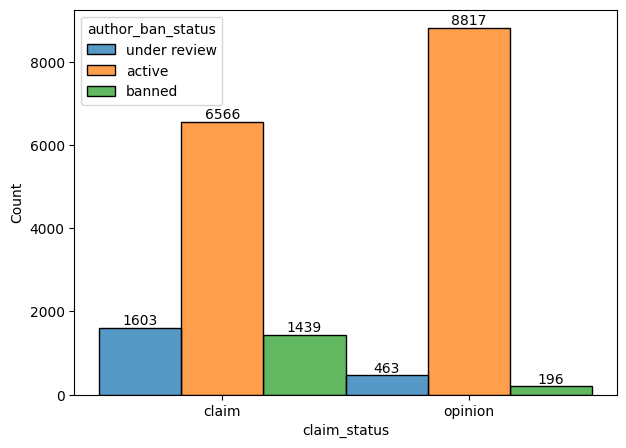

In [ ]:
# Create a histogram
plt.figure(figsize=(7,5))
ax = sns.histplot(data,
             x="claim_status",
             hue="author_ban_status",
             multiple="dodge")

for i in ax.containers:
  plt.bar_label(i) 

plt.show()

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?

#### **Median view counts by ban status**

Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

In [ ]:
group_median_view_ban = data[["author_ban_status","view_#"]].groupby(["author_ban_status"]).median()
group_median_view_ban

,view_#
author_ban_status,
active,8616.0
banned,448201.0
under review,365245.5


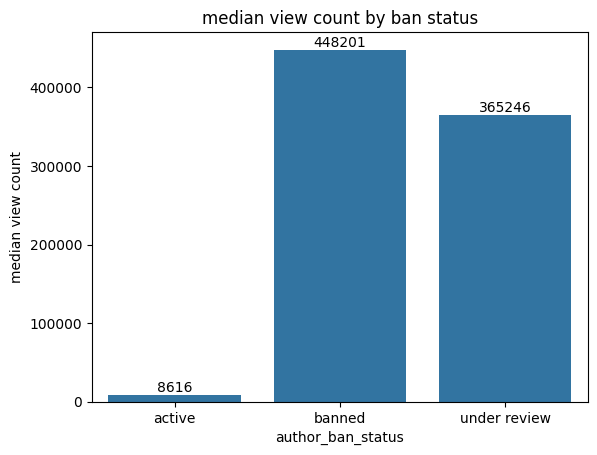

In [ ]:
# Create a bar plot
ax = sns.barplot(
            group_median_view_ban.loc[:,"view_#"])
for i in ax.containers:
  plt.bar_label(i) 

plt.ylabel("median view count")
plt.title("median view count by ban status")

plt.show()

In [ ]:
rates_list = ["view_#","like_#","share_#","download_#","comment_#"]

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

In [ ]:
# Calculate the median view count for claim status.
### YOUR CODE HERE ###

In [ ]:
### YOUR CODE HERE ###

#### **Total views by claim status**

Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

In [ ]:
rates_distribution = data.groupby(["claim_status"])[rates_list].sum() / data.groupby(["claim_status"])[rates_list].sum().sum()
rates_distribution.loc[:,"mean_ratio"] = rates_distribution.sum(axis="columns") / len(rates_distribution.columns)
rates_distribution

,view_#,like_#,share_#,download_#,comment_#,mean_ratio
claim_status,,,,,,
claim,0.990338,0.993564,0.993557,0.993529,0.996166,0.993431
opinion,0.009662,0.006436,0.006443,0.006471,0.003834,0.006569


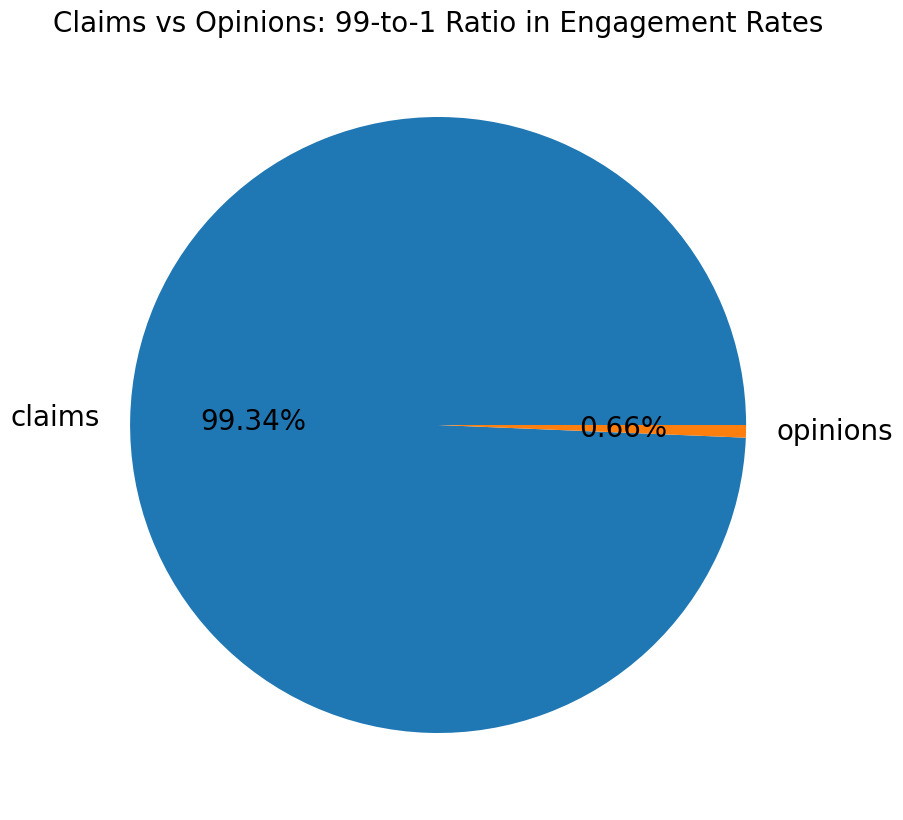

In [ ]:
# Create a pie graph
plt.figure(figsize=(10,10),)
ax = plt.pie(rates_distribution["mean_ratio"], labels=['claims','opinions'],autopct='%.2f%%',textprops={'fontsize': 20})
plt.title("Claims vs Opinions: 99-to-1 Ratio in Engagement Rates", fontsize=20)

plt.show()


**Question:** What do you notice about the overall view count for claim status?

### **Task 4. Determine outliers**

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it's good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. You've learned that a common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the **median** value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [ ]:
def outlier_calculator(data,threshold_mode):
  
  if threshold_mode == "median":
    for var in rates_list:
      q1 = data[var].quantile(0.25)
      q3 = data[var].quantile(0.75)
      iqr = q3 - q1
      median = data[var].quantile(0.5)
      result = len( (data[(data[var] < median - 1.5 * iqr) | (data[var] > median + 1.5 * iqr) ]) )

      print(f"Number of outliers, {var}: {result} , Upper Limit: {q3 + 1.5 * iqr}")

  else:
    for var in rates_list:
      q1 = data[var].quantile(0.25)
      q3 = data[var].quantile(0.75)
      iqr = q3 - q1
      median = data[var].quantile(0.5)
      result = len( (data[(data[var] < q1 - 1.5 * iqr) | (data[var] > q3 + 1.5 * iqr) ]) )
      
      print(f"Number of outliers, {var}: {result} , Upper Limit: {q3 + 1.5 * iqr}")
  print("")

outlier_calculator(data,"median")
outlier_calculator(data,"q")
print("\n")
outlier_calculator(opinion_data,"median")
outlier_calculator(opinion_data,"q")
print("\n")
outlier_calculator(claim_data,"median")
outlier_calculator(claim_data,"q")

Number of outliers, view_#: 2343 , Upper Limit: 1253403.75
Number of outliers, like_#: 3468 , Upper Limit: 311333.875
Number of outliers, share_#: 3732 , Upper Limit: 45382.5
Number of outliers, download_#: 3733 , Upper Limit: 2880.125
Number of outliers, comment_#: 3882 , Upper Limit: 728.5

Number of outliers, view_#: 0 , Upper Limit: 1253403.75
Number of outliers, like_#: 1726 , Upper Limit: 311333.875
Number of outliers, share_#: 2508 , Upper Limit: 45382.5
Number of outliers, download_#: 2450 , Upper Limit: 2880.125
Number of outliers, comment_#: 2789 , Upper Limit: 728.5



Number of outliers, view_#: 0 , Upper Limit: 14917.625
Number of outliers, like_#: 613 , Upper Limit: 3726.5
Number of outliers, share_#: 1051 , Upper Limit: 734.0
Number of outliers, download_#: 1189 , Upper Limit: 44.5
Number of outliers, comment_#: 1478 , Upper Limit: 7.5

Number of outliers, view_#: 0 , Upper Limit: 14917.625
Number of outliers, like_#: 123 , Upper Limit: 3726.5
Number of outliers, share_#

In [ ]:
data_claim_group.describe()

duration_sec                                                     \
                    count       mean        std  min   25%   50%   75%   max   
claim_status                                                                   
claim              9608.0  32.486886  16.172409  5.0  18.0  32.0  47.0  60.0   
opinion            9476.0  32.359856  16.281705  5.0  18.0  32.0  47.0  60.0   

              view_#                                                   \
               count           mean            std     min        25%   
claim_status                                                            
claim         9608.0  501029.452748  291349.239825  1049.0  247003.75   
opinion       9476.0    4956.432250    2885.907219    20.0    2467.00   

                                             like_#                 \
                   50%        75%       max   count           mean   
claim_status                                                         
claim         501555.0  753088.00  999817.0  9608.0  166373.331182   
opinion         4953.0    7447.25    9998.0  9476.0    1092.729844   

                                                                           \
                        std  min       25%       50%        75%       max   
claim_status                                                                
claim         147623.370888  0.0  43436.75  123649.0  255715.25  657830.0   
opinion          964.099816  0.0    289.00     823.0    1664.00    4375.0   

             share_#                                                     \
               count          mean           std  min      25%      50%   
claim_status                                                              
claim         9608.0  33026.416216  38781.676825  0.0  5062.25  17997.5   
opinion       9476.0    217.145631    252.269583  0.0    34.00    121.0   

                                download_#                                 \
                  75%       max      count         mean          std  min   
claim_status                                                                
claim         47256.0  256130.0     9608.0  2070.952227  2424.381846  0.0   
opinion         314.0    1674.0     9476.0    13.677290    16.200652  0.0   

                                              comment_#              \
                 25%     50%     75%      max     count        mean   
claim_status                                                          
claim         324.75  1139.5  2935.5  14994.0    9608.0  691.164863   
opinion         2.00     7.0    19.0    101.0    9476.0    2.697446   

                                                            
                      std  min   25%    50%    75%     max  
claim_status                                                
claim         1017.216834  0.0  68.0  286.0  886.0  9599.0  
opinion          4.089288  0.0   0.0    1.0    3.0    32.0

In [ ]:
data.describe()

,duration_sec,view_#,like_#,share_#,download_#,comment_#
count,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [ ]:
iqr = data["view_#"].quantile(0.75) - data["view_#"].quantile(0.25)
median = data["view_#"].median()

data["outlier"] = data["view_#"].apply(lambda x:
                                      "valid" if ((x>=median - 1.5* iqr) and (x<=median + 1.5* iqr) ) 
                                                             else "outlier")

C:\Users\mertf\AppData\Local\Temp\ipykernel_13436\3235305097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["outlier"] = data["view_#"].apply(lambda x:


In [ ]:
iqr = data["view_#"].quantile(0.75) - data["view_#"].quantile(0.25)
median = data["view_#"].median()
print(median + 1.5* iqr,iqr)

claim_data["outlier"] = claim_data["view_#"].apply(lambda x:
                                      "valid" if ((x>=median - 1.5* iqr) and (x<=median + 1.5* iqr) ) 
                                                             else "outlier")

759031.25 499384.5


C:\Users\mertf\AppData\Local\Temp\ipykernel_13436\2635614495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claim_data["outlier"] = claim_data["view_#"].apply(lambda x:


#### **Scatterplot**

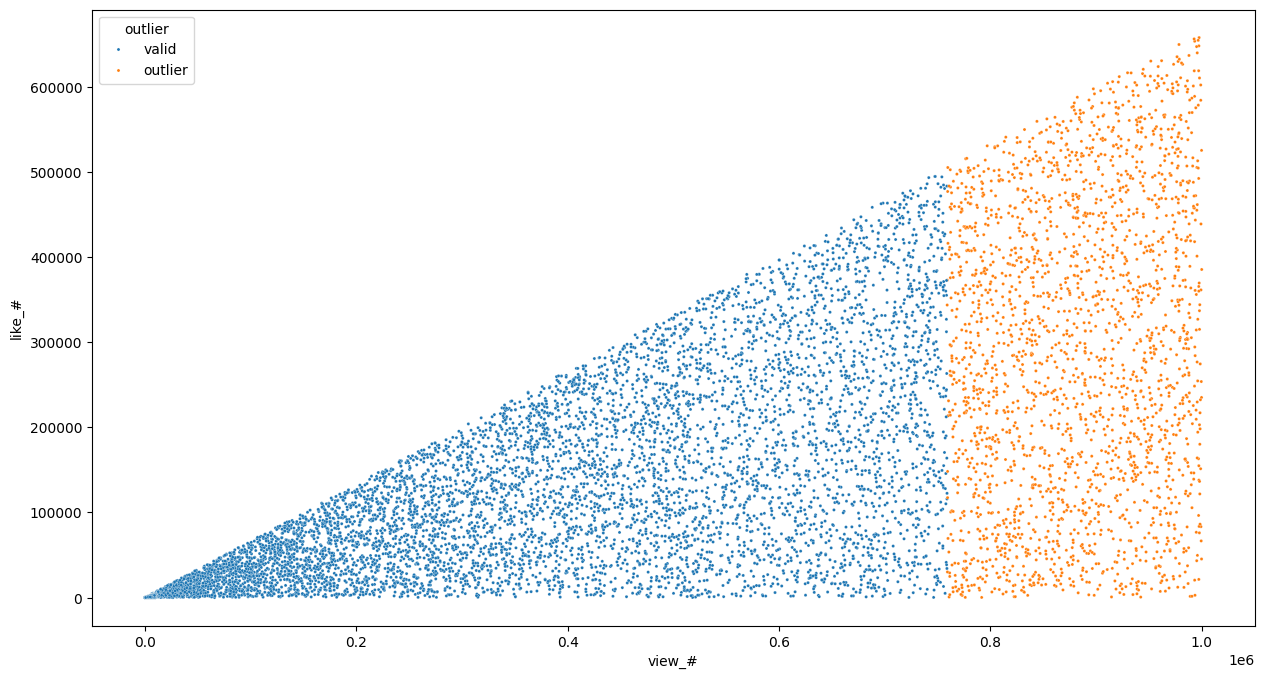

In [ ]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x="view_#", y="like_#", hue="outlier", s=5)
plt.show()


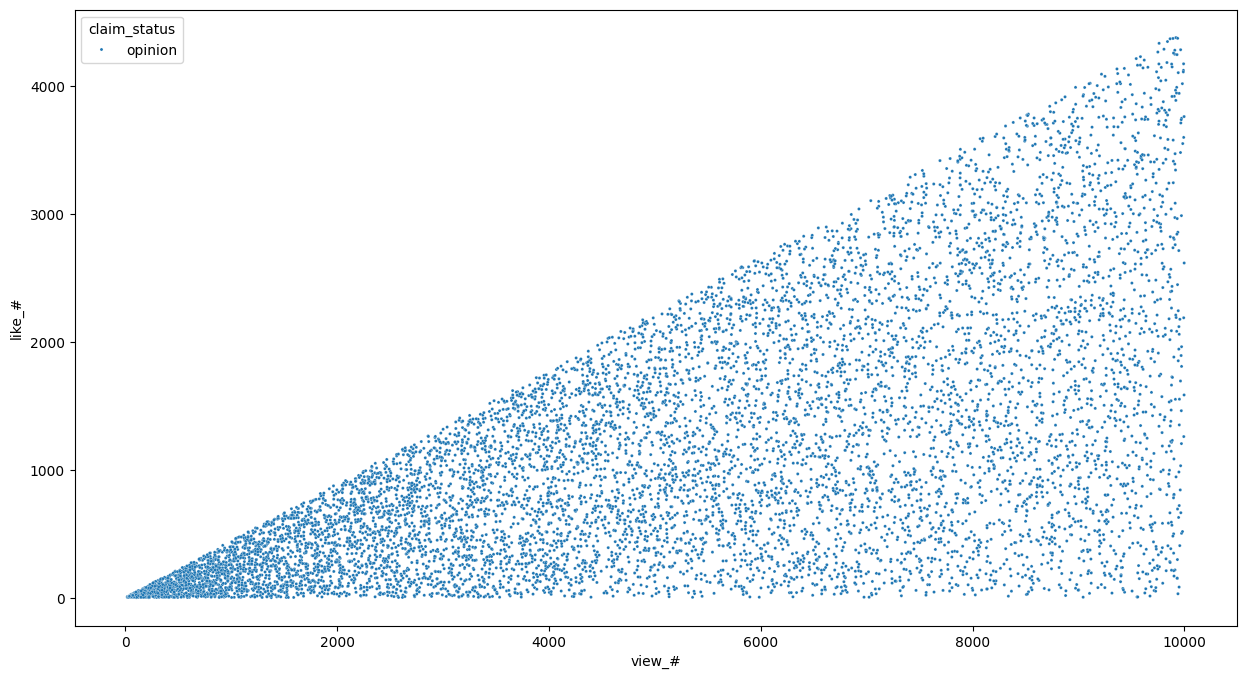

In [ ]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
plt.figure(figsize=(15,8))
sns.scatterplot(data=opinion_data, x="view_#", y="like_#", hue="claim_status", s=5)
plt.show()



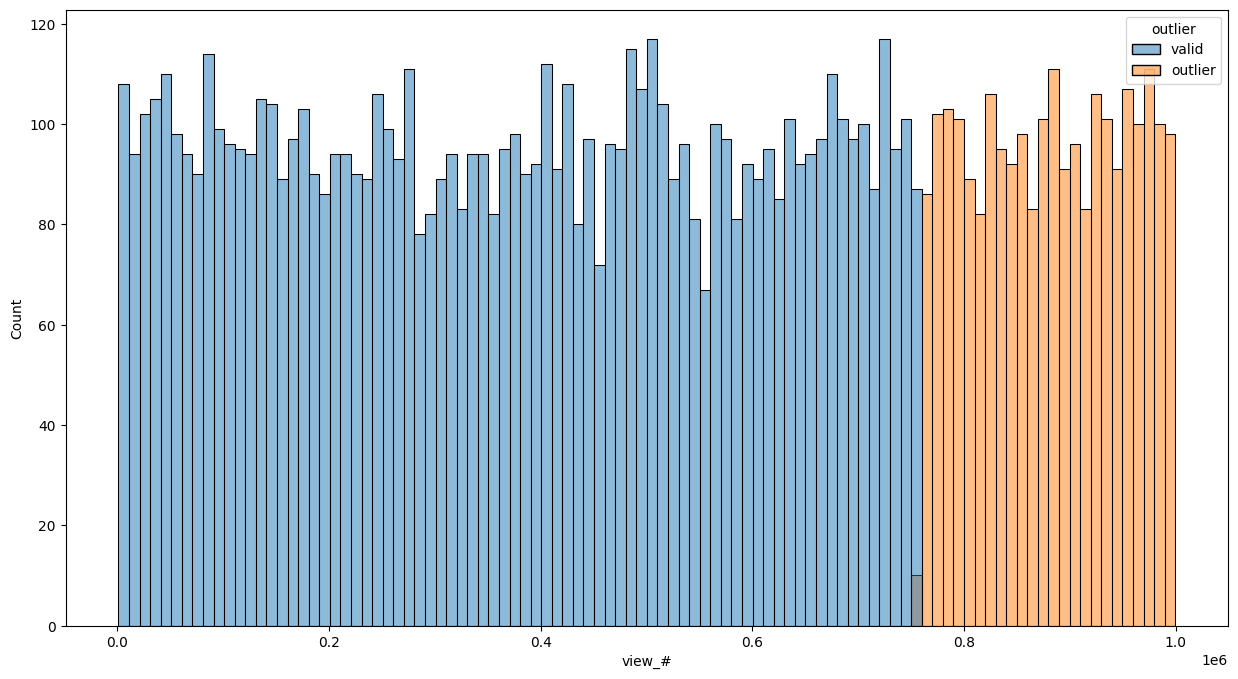

In [ ]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
plt.figure(figsize=(15,8))
ax = sns.histplot(data=claim_data, x="view_#", hue='outlier', binwidth=1e4)
plt.show()



In [ ]:
# Create a scatterplot of ``video_view_count` versus `video_like_count` for opinions only
iqr_opinion = opinion_data["like_#"].quantile(0.75) - opinion_data["like_#"].quantile(0.25)
median_opinion = opinion_data["like_#"].median()
print(iqr_opinion,median_opinion)
opinion_data.loc[:,"outlier_status"] = opinion_data.loc[:,"like_#"].apply(lambda x:
                                                             "valid" if ((x>=median_opinion - 1.5* iqr_opinion) and (x<=median_opinion + 1.5* iqr_opinion) ) 
                                                             else "outlier")
opinion_data


1375.0 823.0


C:\Users\mertf\AppData\Local\Temp\ipykernel_13436\1422734412.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion_data.loc[:,"outlier_status"] = opinion_data.loc[:,"like_#"].apply(lambda x:


,claim_status,duration_sec,transcription_text,verified_status,author_ban_status,view_#,like_#,share_#,download_#,comment_#,outlier_status
9608,opinion,32,i think that hum...,not verified,active,5433.0,1602.0,381.0,12.0,1.0,valid
9609,opinion,22,i think that we ...,verified,active,6748.0,2373.0,387.0,37.0,4.0,valid
9610,opinion,18,i think that dro...,verified,active,5890.0,1501.0,580.0,24.0,1.0,valid
9611,opinion,39,i think that the...,not verified,active,642.0,49.0,5.0,0.0,0.0,valid
9612,opinion,45,i think that dub...,not verified,active,7185.0,1771.0,577.0,28.0,0.0,valid
...,...,...,...,...,...,...,...,...,...,...,...
19079,opinion,49,in our opinion t...,not verified,active,6067.0,423.0,81.0,8.0,2.0,valid
19080,opinion,23,in our opinion t...,not verified,active,2973.0,820.0,70.0,3.0,0.0,valid
19081,opinion,50,in our opinion t...,not verified,active,734.0,102.0,7.0,2.0,1.0,valid
19082,opinion,8,in our opinion l...,not verified,active,3394.0,655.0,123.0,11.0,4.0,valid


In [ ]:
iqr_claim = claim_data["like_#"].quantile(0.75) - claim_data["like_#"].quantile(0.25)
median_claim = claim_data["like_#"].median()
print(iqr_claim,median_claim)
claim_data.loc[:,"outlier_status"] = claim_data.loc[:,"like_#"].apply(lambda x:
                                                             "valid" if ((x>=median_claim - 1.5* iqr_claim) and (x<=median_claim + 1.5* iqr_claim) ) 
                                                             else "outlier")
claim_data

212278.5 123649.0


C:\Users\mertf\AppData\Local\Temp\ipykernel_13436\850037822.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claim_data.loc[:,"outlier_status"] = claim_data.loc[:,"like_#"].apply(lambda x:


,claim_status,duration_sec,transcription_text,verified_status,author_ban_status,view_#,like_#,share_#,download_#,comment_#,outlier,outlier_status
0,claim,59,someone shared w...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,valid,valid
1,claim,32,someone shared w...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,valid,valid
2,claim,31,someone shared w...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,outlier,valid
3,claim,25,someone shared w...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,valid,valid
4,claim,19,someone shared w...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,valid,valid
...,...,...,...,...,...,...,...,...,...,...,...,...
9603,claim,49,a colleague disc...,not verified,active,737177.0,460743.0,54550.0,8119.0,3372.0,valid,outlier
9604,claim,9,a colleague disc...,verified,active,546987.0,360080.0,79346.0,4537.0,2432.0,valid,valid
9605,claim,27,a colleague disc...,not verified,under review,885521.0,209475.0,44286.0,1210.0,794.0,outlier,valid
9606,claim,27,a colleague disc...,not verified,active,356747.0,99394.0,21016.0,1163.0,497.0,valid,valid


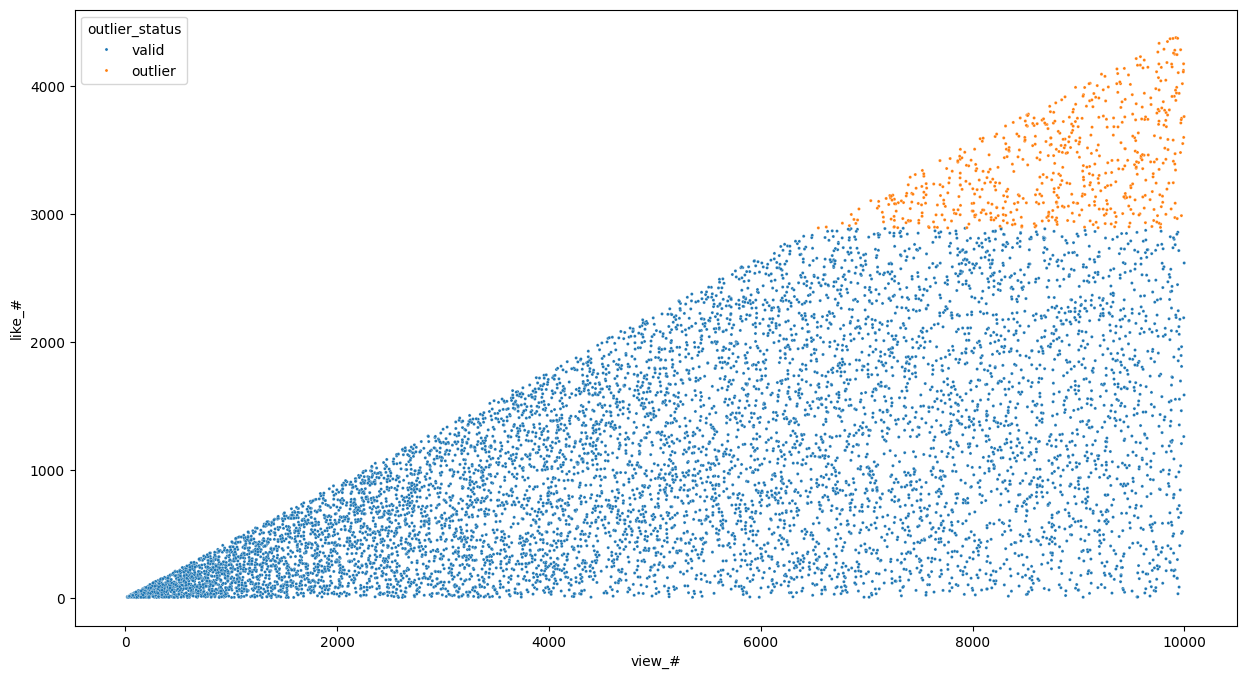

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=opinion_data, x="view_#", y="like_#", s=5 , hue="outlier_status")
plt.show()

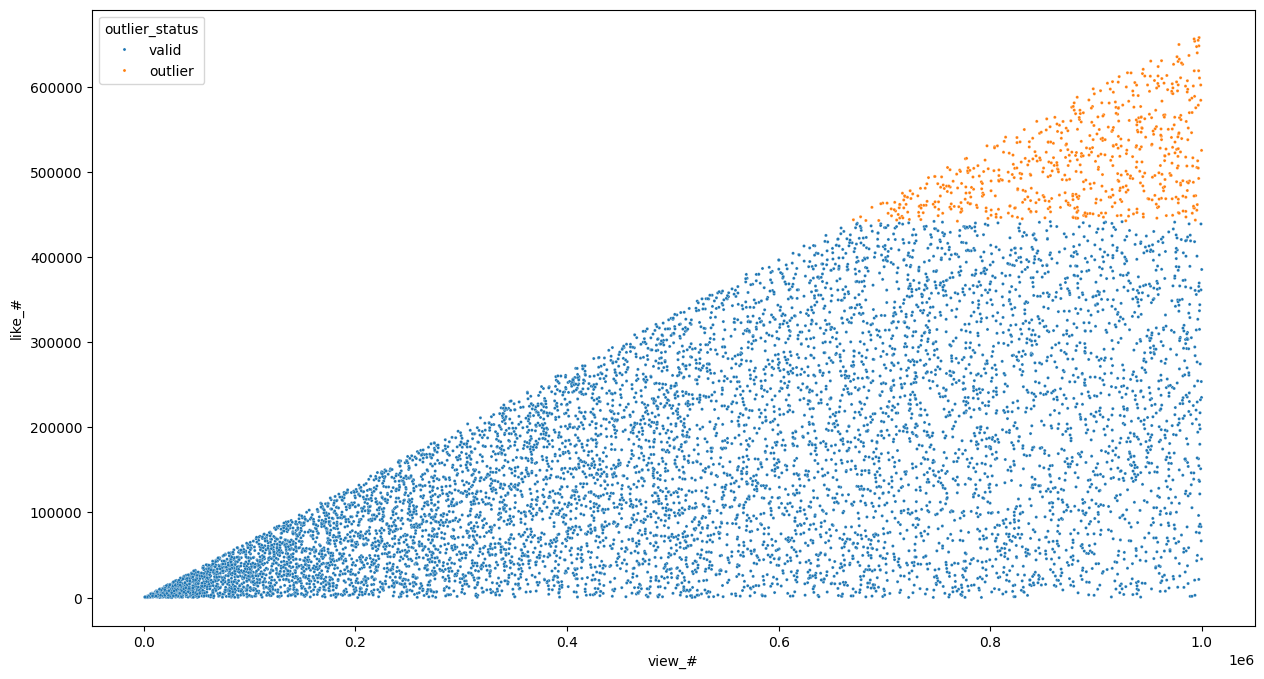

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=claim_data, x="view_#", y="like_#", s=5 , hue="outlier_status")
plt.show()

You can do a scatterplot in Tableau Public as well, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the instructions linked in the previous Activity page.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 5a. Results and evaluation**

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue?

***Pro tip:*** Put yourself in your client's perspective, what would they want to know?

Use the following code cells to pursue any additional EDA. Also use the space to make sure your visualizations are clean, easily understandable, and accessible.

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?


==> ENTER YOUR RESPONSE HERE

I've learned that visualitations are more understandable than tables and there is a story behind the data after filtering and grouping data

My other questions are ....

My client would likely want to know ...



### **Task 5b. Conclusion**
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? What other visuals could you create?


EDA is important because ...

==> ENTER YOUR RESPONSES HERE

Visualizations helped me understand ..

==> ENTER YOUR RESPONSES HERE


You’ve now completed a professional data visualization according to a business need. Well done! Be sure to save your work as a reference for later work in Tableau.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.